In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Python/Lab/Lab 6/bank.csv")
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1217,1218,15696900,Burns,505,Germany,Male,29,3,145541.56,2,1,1,58019.95,0
3304,3305,15676513,Burns,601,Germany,Male,35,8,71553.83,1,1,0,177384.45,0
735,736,15784209,Tang,497,France,Male,47,6,0.00,1,1,1,90055.08,0
7015,7016,15683168,Frederickson,572,France,Female,30,6,0.00,1,0,1,175025.27,0
7090,7091,15565714,Cattaneo,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
1755,1756,15778410,Clarke,533,Spain,Female,52,7,0.00,1,0,1,194113.99,1
6427,6428,15668943,Henderson,746,France,Male,37,2,0.00,2,1,0,143194.05,0
2603,2604,15583049,Wallace,643,Germany,Female,34,7,160426.07,1,0,1,188533.11,0
1770,1771,15689980,Willis,725,Spain,Female,36,4,118520.26,1,0,0,131173.90,1
8190,8191,15813871,Hs?,690,France,Male,47,2,0.00,2,1,0,151375.73,0


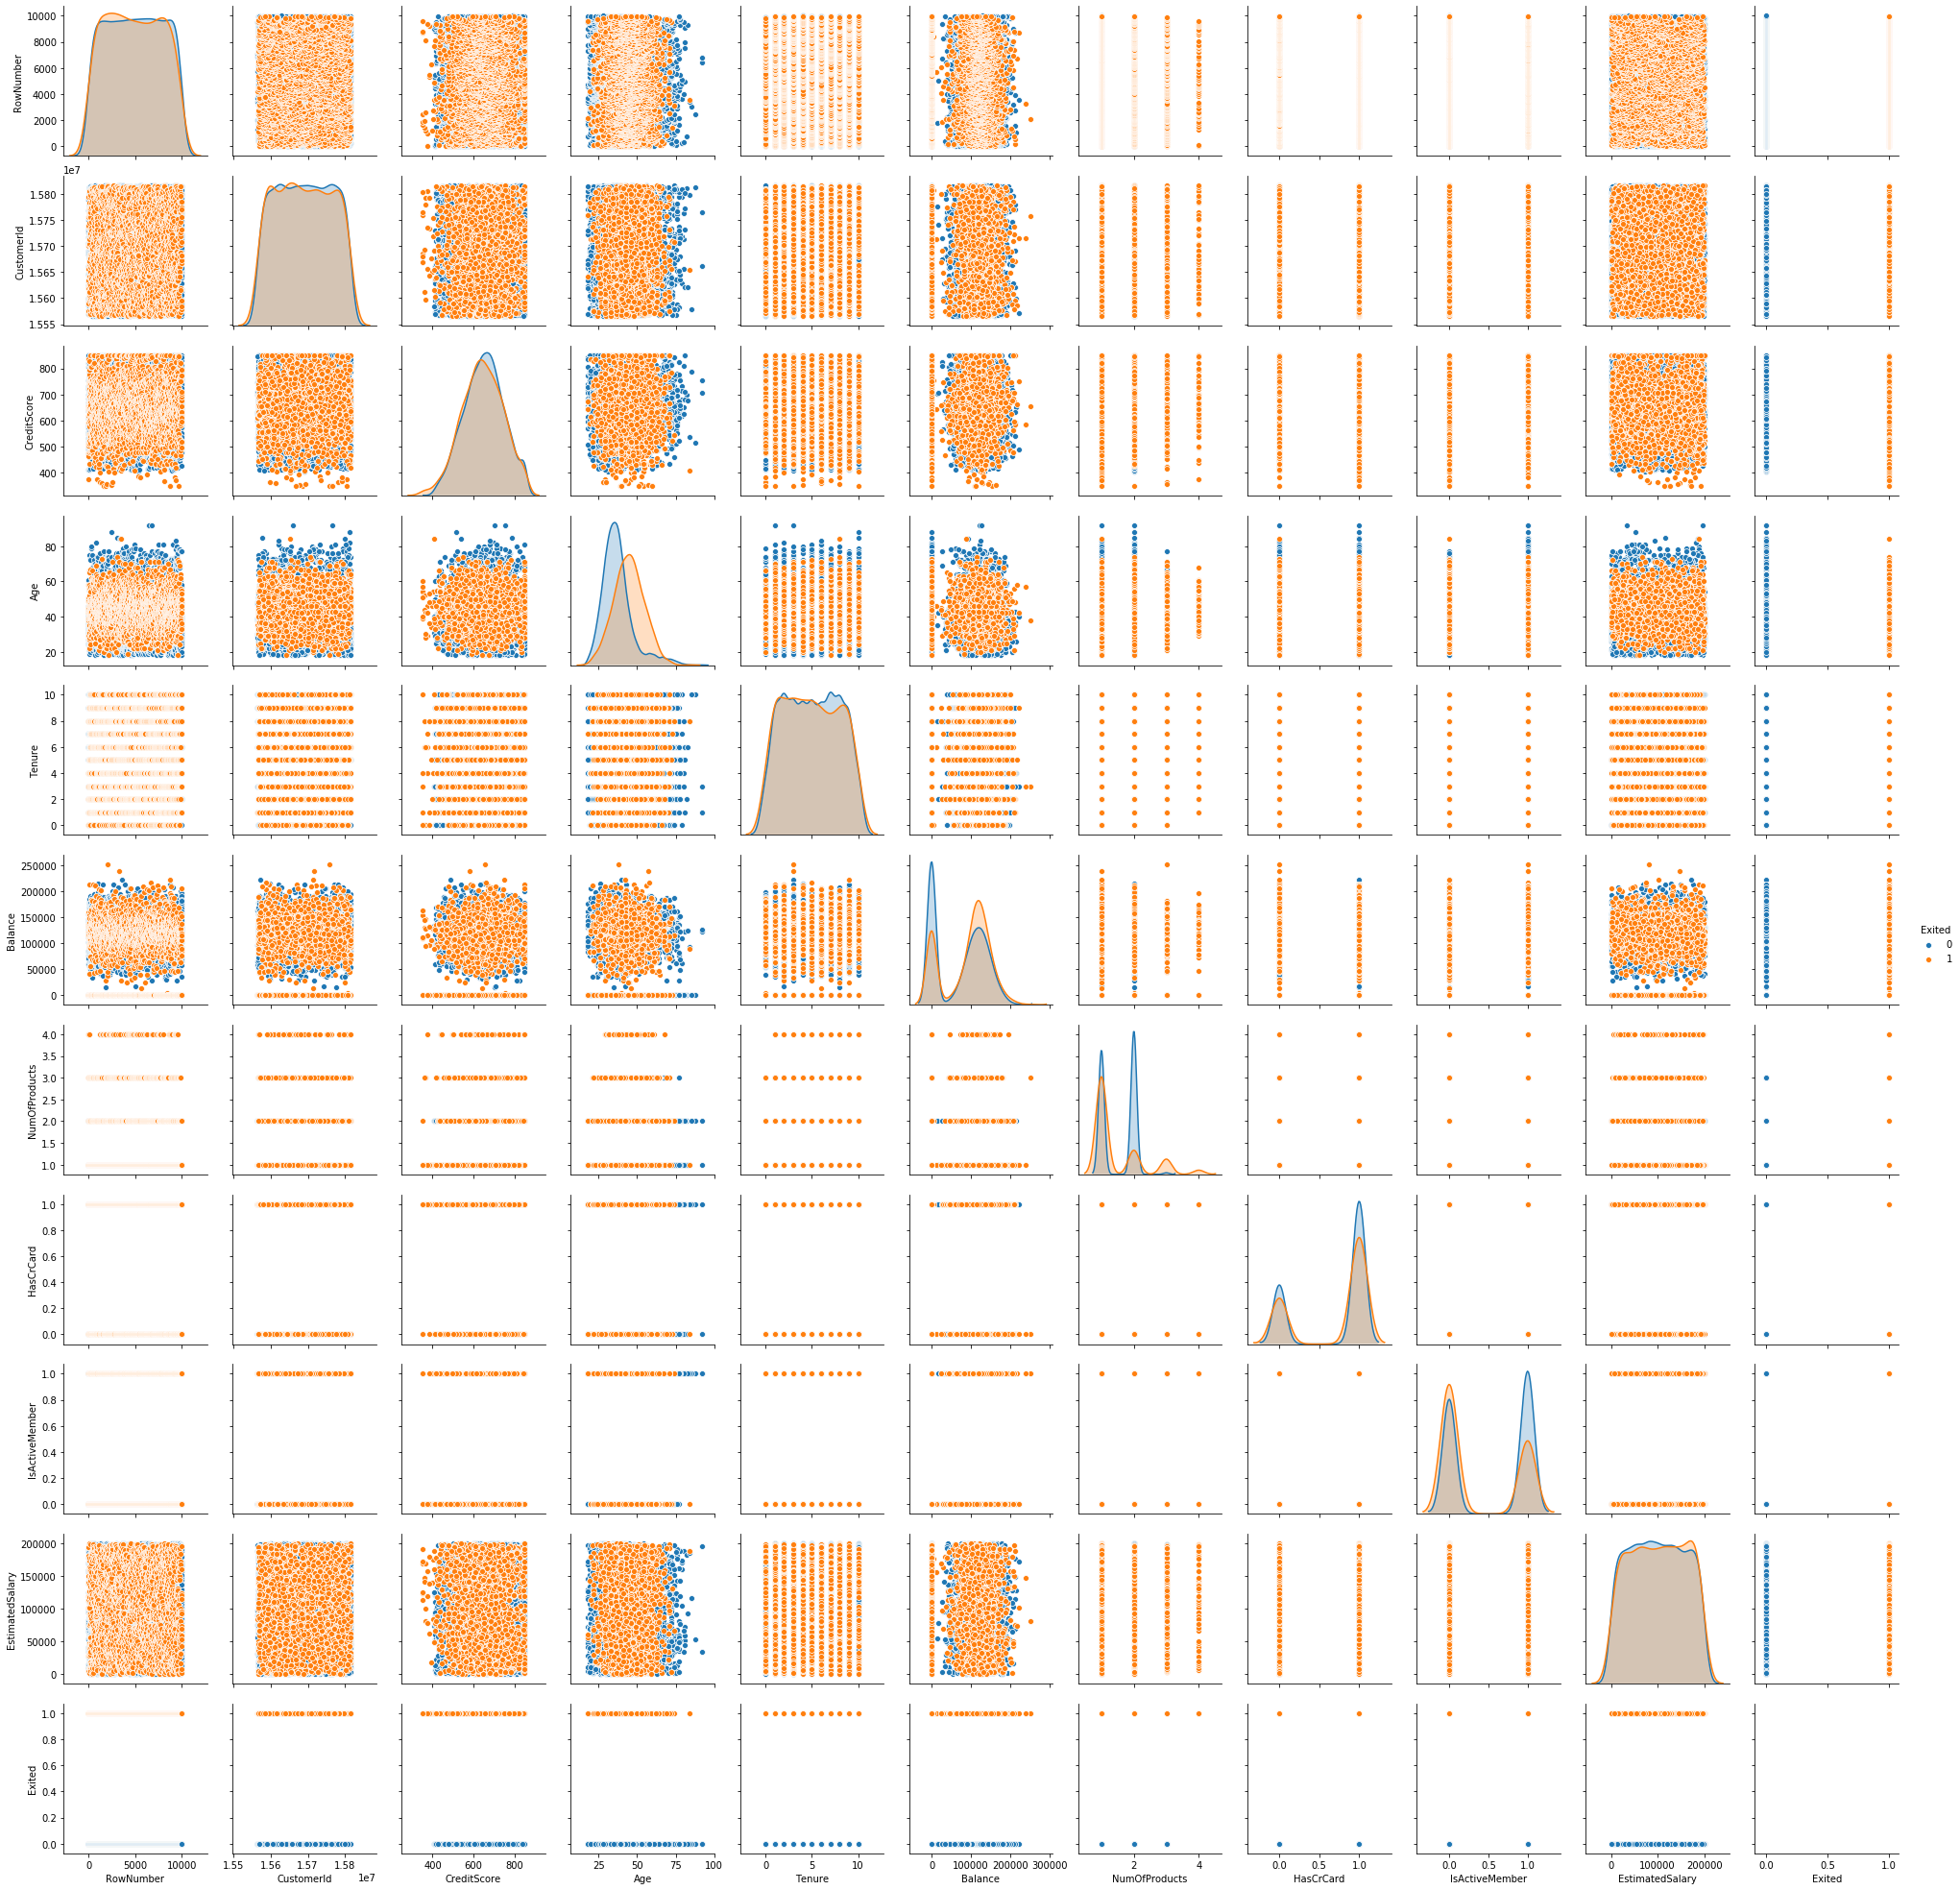

In [5]:
sns.pairplot(data, hue="Exited")

In [0]:
data.drop(columns=['RowNumber', 'CustomerId',], inplace=True)

In [7]:
data.sample(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1825,Tan,770,Germany,Male,45,4,110765.68,1,1,0,26163.74,1
1393,Metcalfe,831,France,Female,32,2,146033.62,1,1,0,191260.74,0
3927,Richards,580,Spain,Female,65,1,0.00,2,0,1,103182.46,0
9943,Fu,784,Spain,Male,23,2,0.00,1,1,1,6847.73,0
1730,P'eng,850,France,Male,20,7,0.00,2,1,0,31288.77,0


In [0]:
data = pd.get_dummies(data, drop_first=True)

In [9]:
data.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz,Surname_Abrego,Surname_Abron,Surname_Achebe,Surname_Adams,Surname_Adamson,Surname_Afamefula,Surname_Afamefuna,Surname_Afanasyev,Surname_Afanasyeva,Surname_Agafonova,Surname_Aguirre,Surname_Ah Mouy,Surname_Ahern,Surname_Ahmed,Surname_Aiken,Surname_Aikenhead,Surname_Ainsworth,Surname_Aitken,Surname_Ajuluchukwu,Surname_Akabueze,Surname_Akeroyd,...,Surname_Yoo,Surname_Yost,Surname_Young,Surname_Younger,Surname_Yu,Surname_Yuan,Surname_Yudin,Surname_Yudina,Surname_Yuille,Surname_Yuriev,Surname_Yuryeva,Surname_Yusupov,Surname_Yusupova,Surname_Zack,Surname_Zaitsev,Surname_Zakharov,Surname_Zarate,Surname_Zaytseva,Surname_Zetticci,Surname_Zhdanov,Surname_Zhdanova,Surname_Zhirov,Surname_Zhou,Surname_Zikoranachidimma,Surname_Zikoranachukwudimma,Surname_Zikoranaudodimma,Surname_Zimmer,Surname_Zinachukwudi,Surname_Zito,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
105,622,46,4,107073.27,2,1,1,30984.59,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6705,663,33,5,157274.36,2,1,1,28531.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2530,624,45,3,68639.57,1,1,0,168002.31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8200,767,47,5,0.00,1,1,0,121964.46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
7072,686,37,9,134560.62,1,1,0,27596.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [11]:
data.shape

(10000, 2943)

In [0]:
X = data.drop(columns="Exited", axis=1)
y = data["Exited"]

In [0]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.30,random_state=2)

In [0]:
import numpy as np
train_x =np.array(train_x).astype('float32')
test_x = np.array(test_x).astype('float32')
train_y =np.array(train_y).astype('float32')
test_y = np.array(test_y).astype('float32')

In [0]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
train_x = transformer.fit_transform(train_x)
test_x = transformer.transform(test_x)

In [16]:
train_x.shape

(7000, 2942)

In [17]:
train_y.shape

(7000,)

In [28]:
test_x.shape

(3000, 2942)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(3, activation='softmax', input_shape=(2942,)))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=50)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 1s 172us/sample - loss: 0.7862 - accuracy: 0.7801 - val_loss: 0.6271 - val_accuracy: 0.8050
Epoch 2/50
7000/7000 [==============================] - 1s 87us/sample - loss: 0.6056 - accuracy: 0.7926 - val_loss: 0.5653 - val_accuracy: 0.8050
Epoch 3/50
7000/7000 [==============================] - 1s 87us/sample - loss: 0.5707 - accuracy: 0.7926 - val_loss: 0.5436 - val_accuracy: 0.8050
Epoch 4/50
7000/7000 [==============================] - 1s 86us/sample - loss: 0.5546 - accuracy: 0.7926 - val_loss: 0.5315 - val_accuracy: 0.8050
Epoch 5/50
7000/7000 [==============================] - 1s 90us/sample - loss: 0.5448 - accuracy: 0.7926 - val_loss: 0.5239 - val_accuracy: 0.8050
Epoch 6/50
7000/7000 [==============================] - 1s 82us/sample - loss: 0.5382 - accuracy: 0.7926 - val_loss: 0.5186 - val_accuracy: 0.8050
Epoch 7/50
7000/7000 [==============================] - 1s 87us/sampl

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 8829      
Total params: 8,829
Trainable params: 8,829
Non-trainable params: 0
_________________________________________________________________
